In [2]:
import numpy as np
from scipy import ndimage
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import u_time as ut
from mpl_toolkits.basemap import Basemap
from eod import msg
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16., 9.)
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
import scipy.optimize as so
import pickle as pkl

In [4]:
#myDicts = pkl.load( open ('/users/global/cornkle/data/OBS/MSG_TRMM_temp_pcp_300px2004-2013.p', 'rb'))

myDicts = pkl.load( open ('/users/global/cornkle/data/OBS/MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [7]:
dic=myDicts[0]
dicf=myDicts[1]

In [10]:
print(dic.keys())
print(dicf.keys())

dict_keys(['pi', 'perc', 'p', 'mon', 'tpixel_strat', 'lon', 't', 'pmax', 'hod', 'yr', 'tpixel_nzero', 'tpixel', 'pp', 'lat', 'tpixel_zero', 'tpixel_conv', 'tpixel_derived'])
dict_keys(['tpixel_stratNZ', 'ppconv', 'piconv', 'pmaxconv', 'mon', 'lon', 'hod', 'yr', 'pconv', 'lat', 'tconv', 'tpixel_convNZ', 'perc', 'tnfconv'])


In [4]:
p=np.array(dic['pmax'])
t=np.array(dic['t'])
print p.size
print np.nanmean(np.array(dic['perc']))

322
29.97921673


In [904]:
pc = p
tm = t
print len(tm)
print len(pc)
#m,b = np.polyfit(pc,pc,1)
print pearsonr(pc,tm)

a=np.array([])
if a.any(): print 'oh'

842
842
(-0.18445146341049351, 7.0207552333191135e-08)


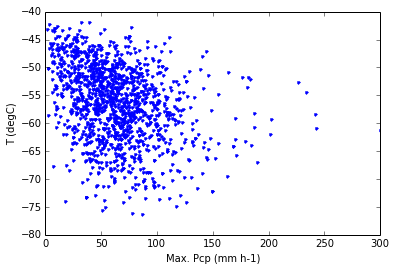

In [895]:
plt.plot(pc, tm, '.')
plt.xlabel('Max. Pcp (mm h-1)')
plt.ylabel('T (degC)')
#plt.plot(pc, m*pc+b, '-')
plt.savefig('/users/global/cornkle/scatter_maxPCP.pdf')

[   9.   28.   45.   90.  115.  116.   84.   52.    6.]
[  11.   36.   69.  121.  157.  179.  158.   99.   12.]
[ 81.81818182  77.77777778  65.2173913   74.38016529  73.24840764
  64.80446927  53.16455696  52.52525253  50.        ]
3.67474326525
[-74.41393575 -70.73919248 -67.06444922 -63.38970595 -59.71496269
 -56.04021942 -52.36547616 -48.69073289 -45.01598962]


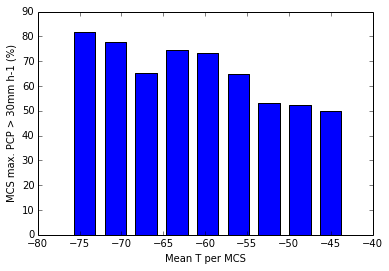

In [907]:
po30=np.where(pc > 30)
to30=tm[po30]
H1, bins1 = np.histogram(to30, bins=9, range=(tm.min(), tm.max()))
H, bins = np.histogram(tm, bins=9, range=(tm.min(), tm.max()))
#width=np.diff(bins)
#freq=float(H)/float(to30.size)
#plt.bar(bins[:-1], freq, width)
H=H.astype(float)
H1=H1.astype(float)
print H1
print H
hist=H1/H*100.
print hist
width = 0.7 * (bins[1] - bins[0])
print bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) / 2
print center
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Mean T per MCS')
plt.ylabel('MCS max. PCP > 30mm h-1 (%)')
plt.savefig('/users/global/cornkle/histo_maxPCP_over_98thcentile_convFlag.pdf')

(-0.43284326606500273, 1.3280874273513484e-80)
1747


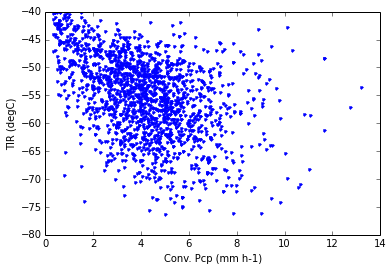

In [764]:
p=np.array(dic['p'])
t=np.array(dic['t'])
pc = p[(p>0) & (p<15)]
tm = t[(p>0) & (p<15)]
print pearsonr(pc,tm)
print p.size
plt.plot(pc, tm, '.')
plt.xlabel('Conv. Pcp (mm h-1)')
plt.ylabel('TIR (degC)')
#plt.plot(pc, m*pc+b, '-')

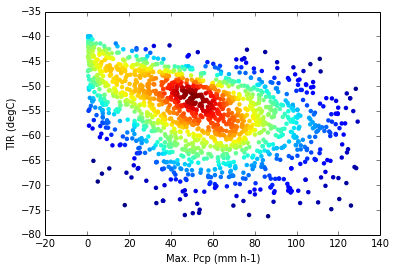

In [777]:
# Calculate the point density
xy = np.vstack([pc,tm])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(pc, tm, c=z, edgecolor='')
plt.xlabel('Max. Pcp (mm h-1)')
plt.ylabel('TIR (degC)')
plt.savefig('/users/global/cornkle/msg_trmm_scatter_max.pdf')

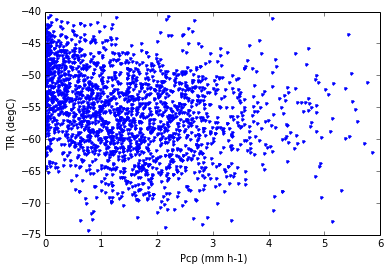

In [402]:
plt.plot(pc, tm, '.')
plt.xlabel('Pcp (mm h-1)')
plt.ylabel('TIR (degC)')
#plt.plot(pc, m*pc+b, '-')
plt.savefig('/users/global/cornkle/msg_trmm_scatter_nofilter.pdf')

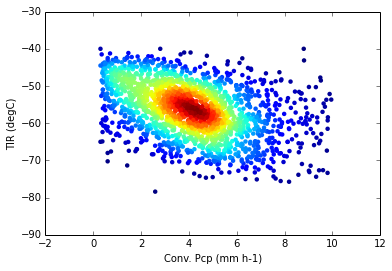

In [576]:
# Calculate the point density
xy = np.vstack([pc,tm])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(pc, tm, c=z, edgecolor='', cmap=plt.cm.jet)
plt.xlabel('Conv. Pcp (mm h-1)')
plt.ylabel('TIR (degC)')
plt.savefig('/users/global/cornkle/msg_trmm_scatter_dens.pdf')


<matplotlib.colorbar.Colorbar instance at 0x7fe9d0c995f0>

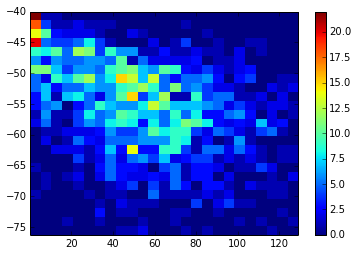

In [781]:
plt.hist2d(pc, tm, bins=25, cmap=plt.cm.jet)
plt.colorbar()

0.0
1.0
5.0


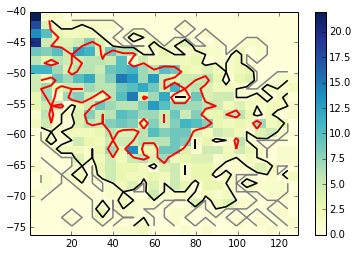

In [782]:
fig = plt.figure()
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(tm, pc, bins=(25, 25))

p25=np.percentile(H, 25)
p50=np.percentile(H, 50)
p75=np.percentile(H, 75)

print p25
print p50
print p75
dy = yedges[1]-yedges[0]
dx = xedges[1]-xedges[0]
extent_dens = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
extent_cont = [yedges[0]+dy/2, yedges[-1]-dy/2, xedges[0]+dx/2, xedges[-1]-dx/2]
#subplots_adjust(bottom=0.15, left=0.15)
levels = (pp75, pp50, pp25)
plt.imshow(H,origin='lower',extent=extent_dens,aspect='auto', interpolation='none', cmap='YlGnBu')
plt.colorbar()
cset = plt.contour(H, levels, origin='lower',colors=['red', 'black','grey'],linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent_cont)
#plt.clabel(cset, inline=1, fontsize=10, fmt='%1.0i')
for c in cset.collections:
    c.set_linestyle('solid')


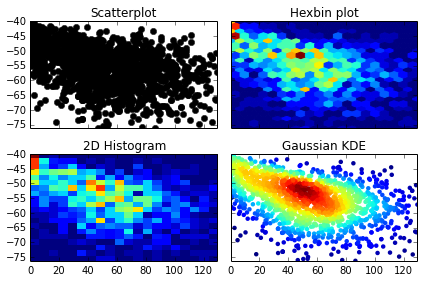

In [783]:
x=pc
y=tm
nbins = 20

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
xy = np.vstack([pc,tm])
axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(x, y, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde(xy)(xy)

axes[1, 1].set_title('Gaussian KDE')
axes[1, 1].scatter(pc, tm, c=z, edgecolor='')

fig.tight_layout()
plt.show()

In [523]:
H, xedges, yedges = np.histogram2d(tm, pc, bins=(25, 25))
x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,25))
y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((25,1))
dy = yedges[1]-yedges[0]
dx = xedges[1]-xedges[0]
extent_dens = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
extent_cont = [yedges[0]+dy/2, yedges[-1]-dy/2, xedges[0]+dx/2, xedges[-1]-dx/2]

pdf = (H*(x_bin_sizes*y_bin_sizes))

one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
levels = [one_sigma, two_sigma, three_sigma]

fig = plt.figure()
ax = fig.add_subplot(111)

#subplots_adjust(bottom=0.15, left=0.15)

plt.imshow(H,origin='lower',extent=extent_dens,aspect='auto', interpolation='none', cmap='YlGnBu')
plt.colorbar()
cset = plt.contour(H, levels, origin='lower',colors=['black', 'green','red'],linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent_cont)
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.0i')
for c in cset.collections:
    c.set_linestyle('solid')

ValueError: f(a) and f(b) must have different signs

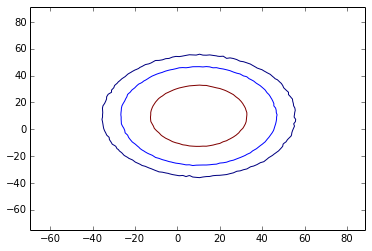

In [520]:
def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))

    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    levels = [one_sigma, two_sigma, three_sigma]

    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T

    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)

    return contour

def test_density_contour():
    norm = np.random.normal(10., 15., size=(12540035, 2))
    density_contour(norm[:,0], norm[:,1], 100, 100)
    plt.show()

test_density_contour()

In [593]:
aa=np.array([[1,2,0,4],[5,0,5,8]])
np.count_nonzero(aa)

6

In [18]:
a= np.array([1,3,4,5,6,7,8])
b=np.array([4,6,6,7,8,9])
t=unq_searchsorted(a,b)

In [19]:
g=t[1]
g

array([ True,  True,  True,  True,  True, False], dtype=bool)

In [17]:
a[g]

array([4, 6, 7, 8])

In [ ]:
def unq_searchsorted(A,B):

    # Get unique elements of A and B and the indices based on the uniqueness
    unqA,idx1 = np.unique(A,return_inverse=True)
    unqB,idx2 = np.unique(B,return_inverse=True)

    # Create mask equivalent to np.in1d(A,B) and np.in1d(B,A) for unique elements
    mask1 = (np.searchsorted(unqB,unqA,'right') - np.searchsorted(unqB,unqA,'left'))==1
    mask2 = (np.searchsorted(unqA,unqB,'right') - np.searchsorted(unqA,unqB,'left'))==1

    # Map back to all non-unique indices to get equivalent of np.in1d(A,B), 
    # np.in1d(B,A) results for non-unique elements
    return mask1[idx1],mask2[idx2]